## Description:
### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### About Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Dataset Attributes

**country** : Name of the country

**child_mort** : Death of children under 5 years of age per 1000 live births

**exports** : Exports of goods and services per capita. Given as %age of the GDP per capita

**health** : Total health spending per capita. Given as %age of GDP per capita

**imports** : Imports of goods and services per capita. Given as %age of the GDP per capita

**Income** : Net income per person

**Inflation** : The measurement of the annual growth rate of the Total GDP

**life_expec** : The average number of years a new born child would live if the current mortality patterns are to rem...

**total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain th...

**gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.


## Importing Libraries

In [967]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [968]:
pd.options.mode.copy_on_write = True # Allow re-write on variable

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings

## Data description

In [969]:
data = pd.read_csv("Country_data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


In [970]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


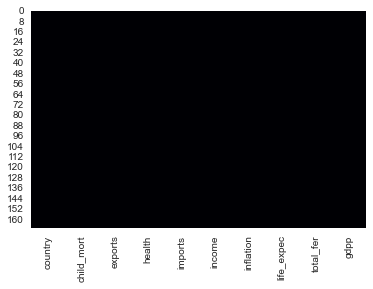

In [971]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [972]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


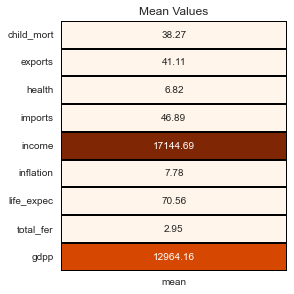

In [973]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

## Exploratory Data Analysis

In [974]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


### Distribution of Features :

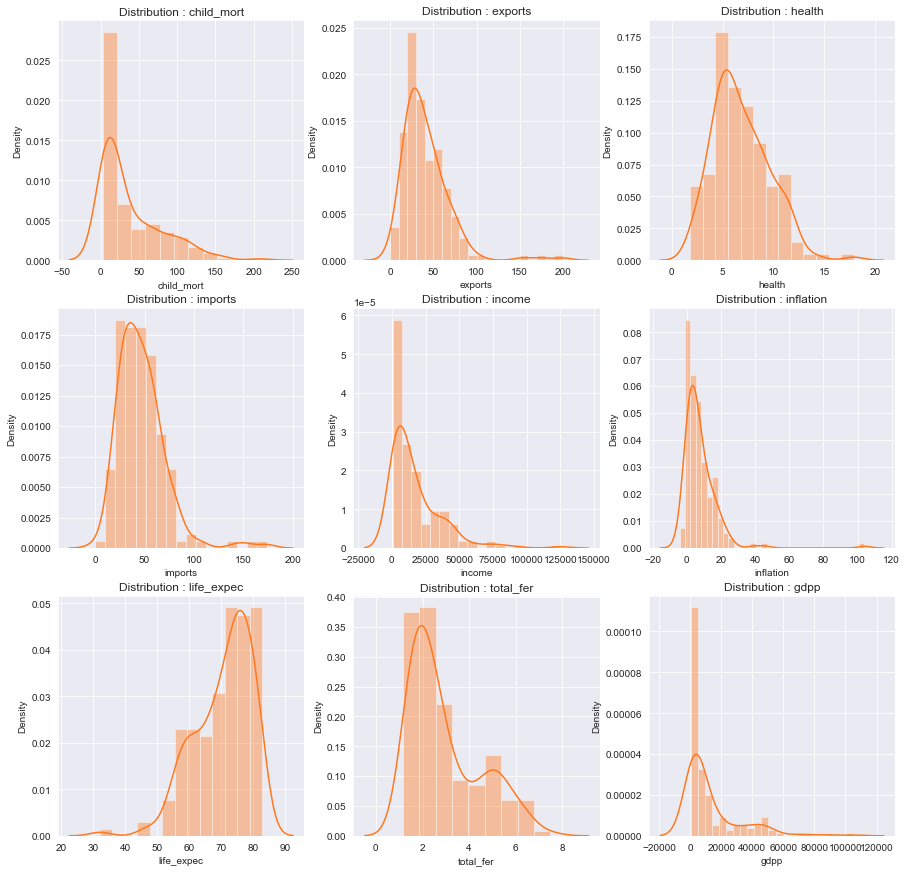

In [975]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **life_expec** displays a left or negatively skewed data distribution.

- **health** displays a normally distrubuted data.

- All the remaining features show a right or positively skewed data distribution.

- Data distribution of **country** is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

**Features of Economically Backward Countries :**

- The country's **per capita income is very low.**
- **High Population** that leads to non - availability of resources.
- **Unemployment** due to less resources.
- Low country wealth that leads to **low capital**.
- Inequitable distribution of **wealth** and **income**.
- Lack of proper educational amenities and thus **illiteracy prevails**.
- **Low level of living.**
- **No technical advancement.**
- **Poor health services** coupled with high birth & death rates.

HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!

#### Country vs Child Mortality :

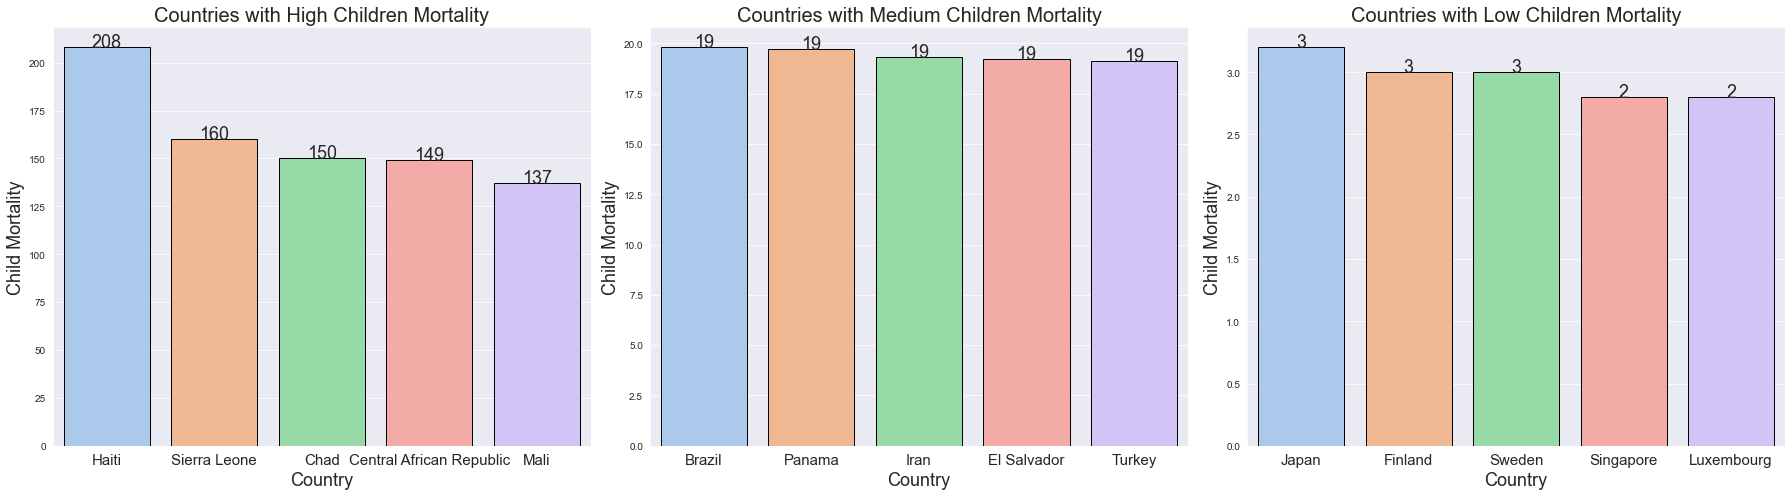

In [976]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='child_mort', data=data.sort_values(ascending=False, by='child_mort').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Children Mortality', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Child Mortality', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='child_mort').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='child_mort', data=data.sort_values(ascending=False, by='child_mort').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Children Mortality', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Child Mortality', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='child_mort').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='child_mort', data=data.sort_values(ascending=False, by='child_mort').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Children Mortality', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Child Mortality', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='child_mort').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- Haiti has the highest children's deaths. African countries have significant positions in this statistic.
- At the other extreme of child_mort, countries from Asia and Europe has some solid presence.

#### Country vs Exports :

exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!

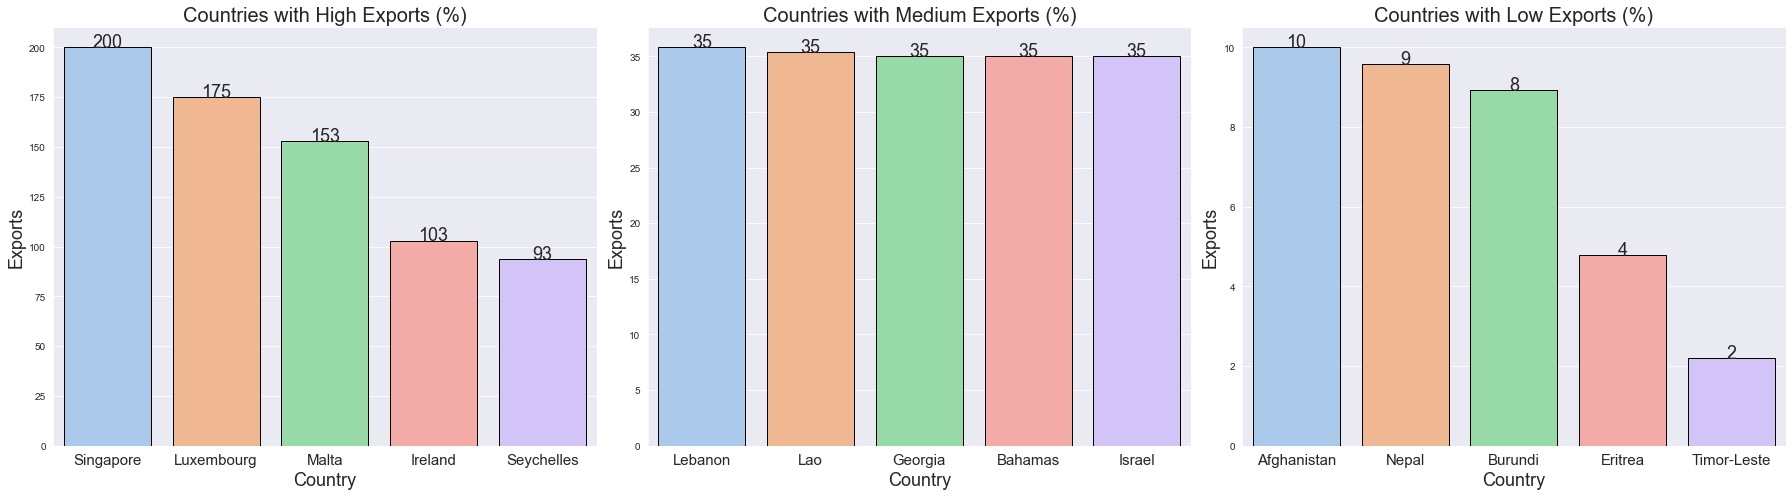

In [977]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='exports', data=data.sort_values(ascending=False, by='exports').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Exports (%)', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Exports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='exports').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='exports', data=data.sort_values(ascending=False, by='exports').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Exports (%)', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Exports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='exports').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='exports', data=data.sort_values(ascending=False, by='exports').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Exports (%)', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Exports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='exports').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- exports of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite Singapore's population size not being in the top 100, they have the highest number of exports. Luxembourg & Malta have probably followed the same route.
- Afghanistan & Nepal are present in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

#### Country vs Health :

health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!

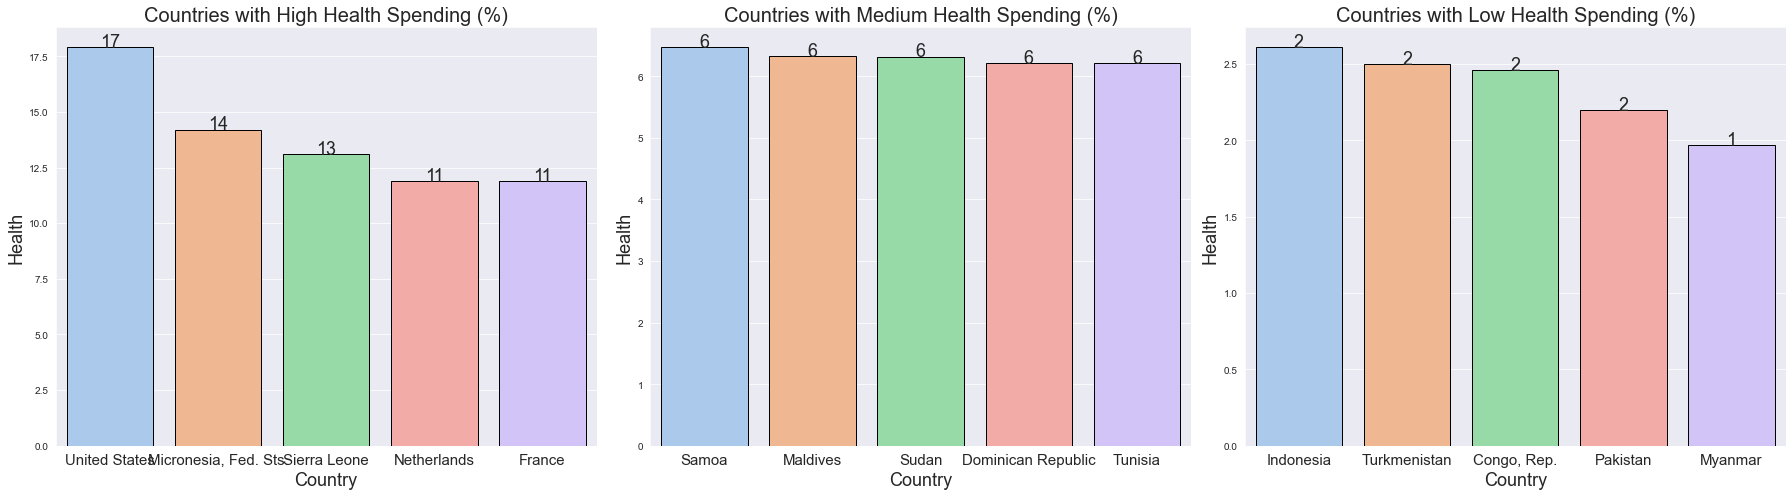

In [978]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='health', data=data.sort_values(ascending=False, by='health').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Health Spending (%)', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Health', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='health').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='health', data=data.sort_values(ascending=False, by='health').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Health Spending (%)', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Health', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='health').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='health', data=data.sort_values(ascending=False, by='health').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Health Spending (%)', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Health', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='health').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- US stands at the top when it comes to spending on health with 17% of the individual GDP contribution.
- 6% seems to be the mean values of the citizens spending on their health.
- Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.

#### Country vs Imports :

imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!

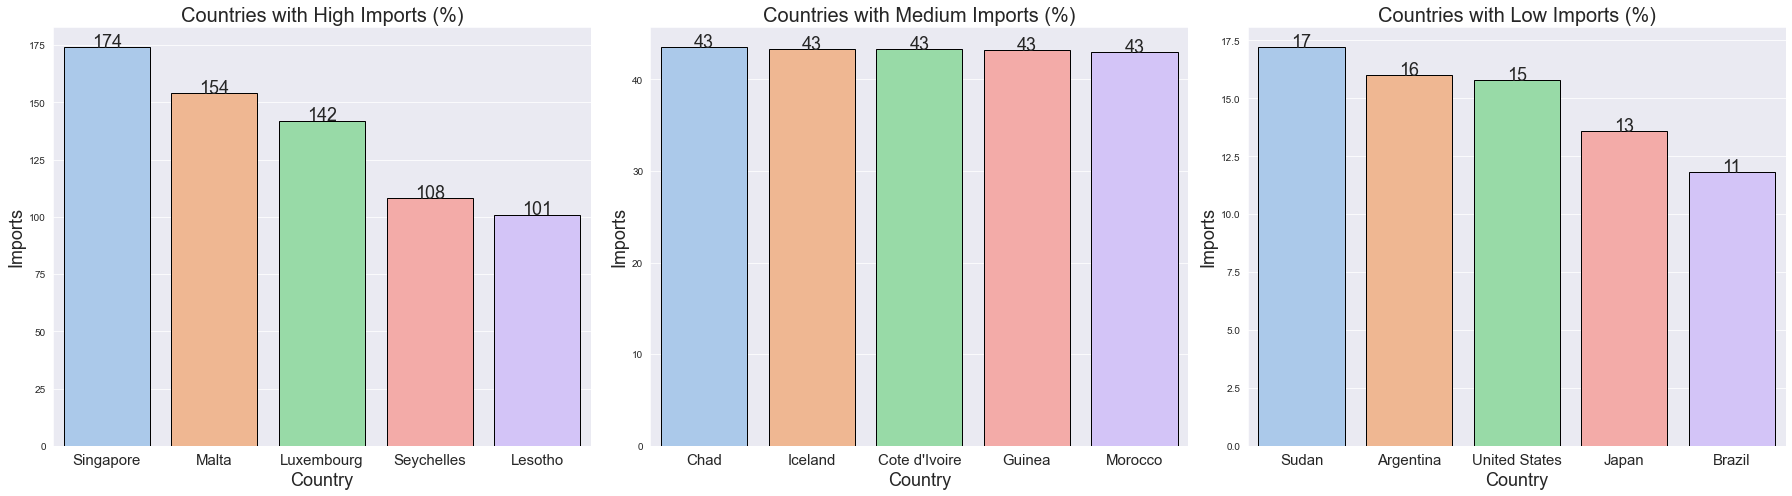

In [979]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='imports', data=data.sort_values(ascending=False, by='imports').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Imports (%)', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Imports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='imports').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='imports', data=data.sort_values(ascending=False, by='imports').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Imports (%)', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Imports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='imports').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='imports', data=data.sort_values(ascending=False, by='imports').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Imports (%)', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Imports', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='imports').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

#### Country vs Income :

income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!

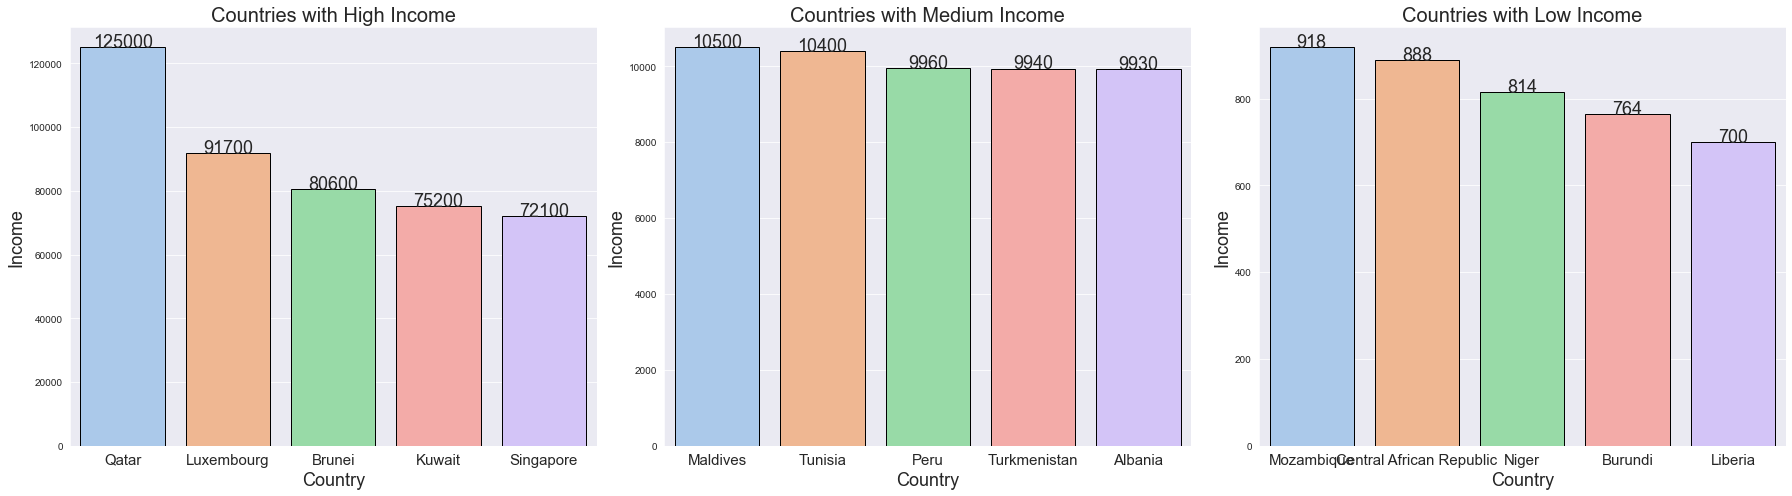

In [980]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='income', data=data.sort_values(ascending=False, by='income').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Income', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Income', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='income').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='income', data=data.sort_values(ascending=False, by='income').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Income', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Income', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='income').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='income', data=data.sort_values(ascending=False, by='income').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Income', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Income', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='income').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- Citizens of the Qatar have the highest income out of all the countries with a difference of 30k more than the 2nd placed countries. Singapore & Luxembourg are again present in the top 5 of another feature.
- Lower end of the income is dominated by the African nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered.
- The difference in the income of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

#### Country vs Inflation :

inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!

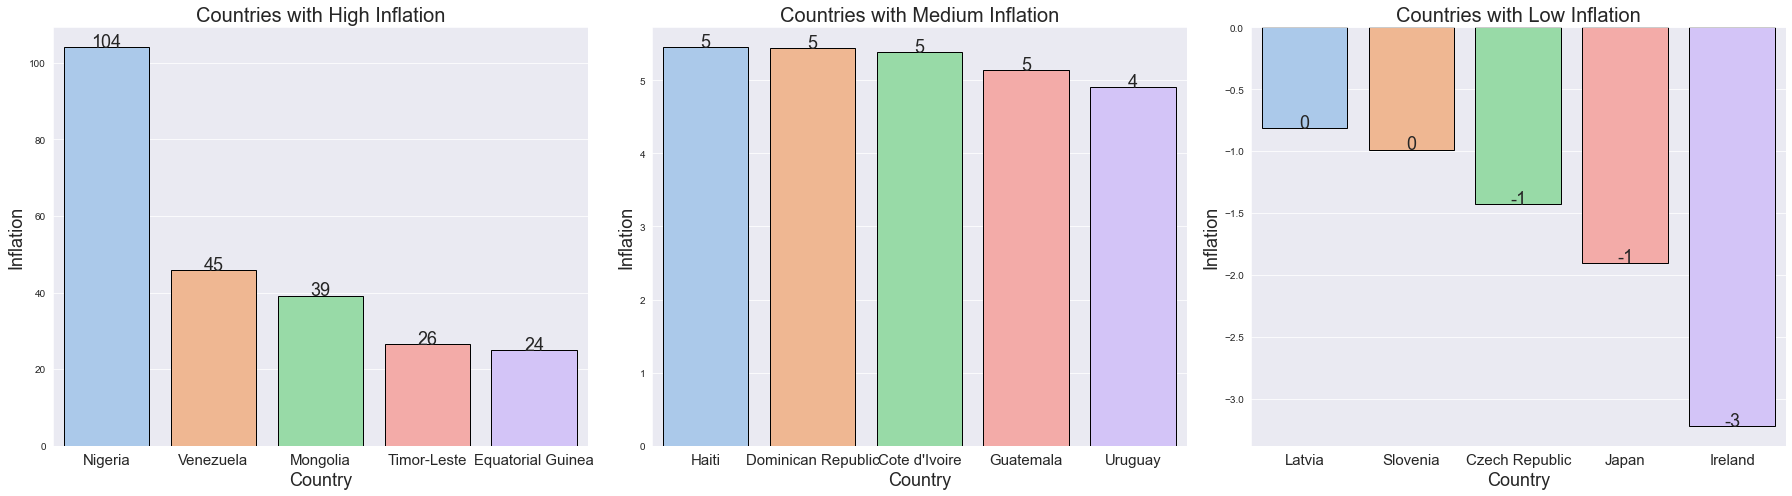

In [981]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='inflation', data=data.sort_values(ascending=False, by='inflation').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Inflation', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Inflation', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='inflation').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='inflation', data=data.sort_values(ascending=False, by='inflation').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Inflation', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Inflation', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='inflation').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='inflation', data=data.sort_values(ascending=False, by='inflation').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Inflation', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Inflation', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='inflation').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- Higher inflation reduces the purchasing power of the citizens. Countries present at the top end of inflation have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of inflation has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

#### Country vs Life Expectancy :

life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!

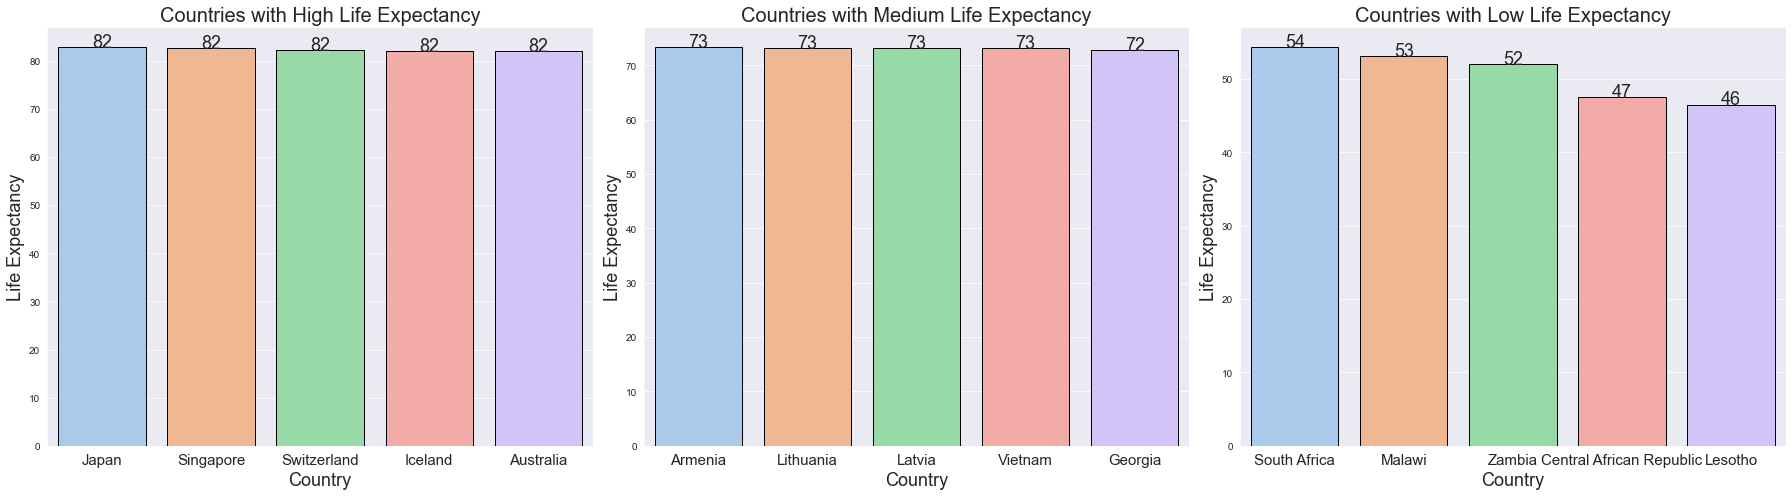

In [982]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='life_expec', data=data.sort_values(ascending=False, by='life_expec').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Life Expectancy', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Life Expectancy', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='life_expec').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='life_expec', data=data.sort_values(ascending=False, by='life_expec').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Life Expectancy', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Life Expectancy', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='life_expec').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='life_expec', data=data.sort_values(ascending=False, by='life_expec').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Life Expectancy', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Life Expectancy', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='life_expec').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
- None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
- African countries are again present in the lower end for another feature.

#### Country vs Total Fertility :

total_fer : Economically backward countries have a high fertility rate!

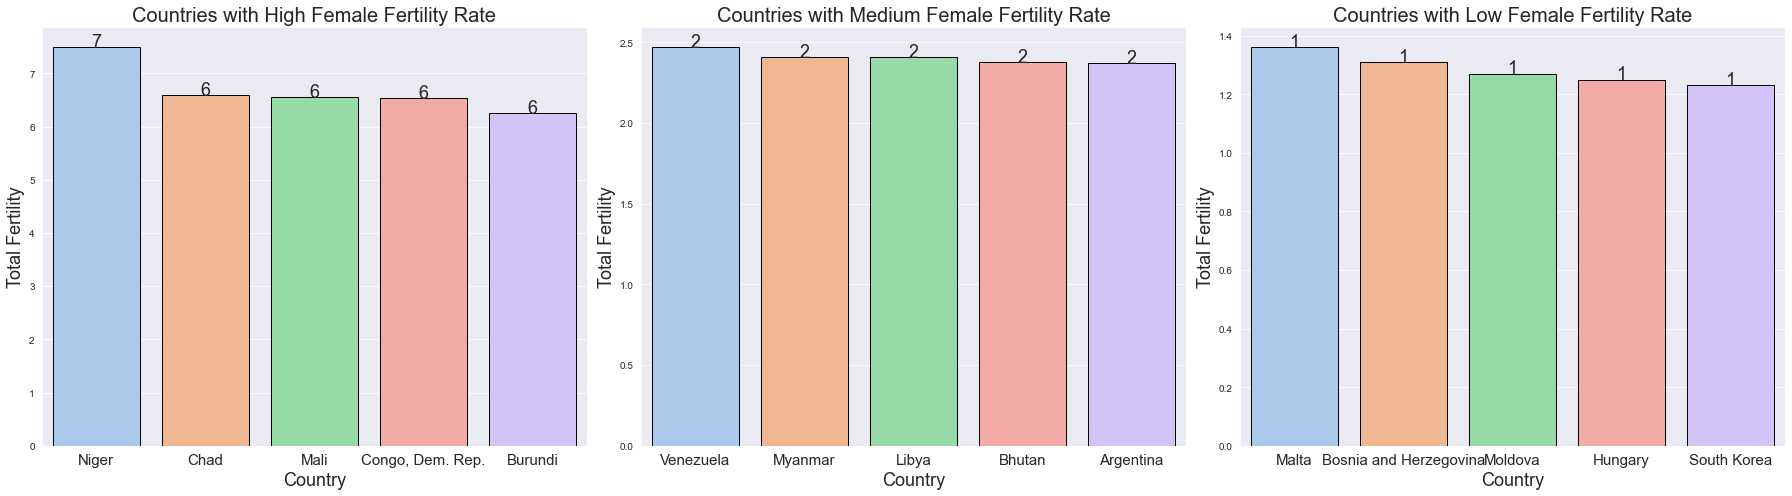

In [983]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='total_fer', data=data.sort_values(ascending=False, by='total_fer').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High Female Fertility Rate', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('Total Fertility', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='total_fer').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='total_fer', data=data.sort_values(ascending=False, by='total_fer').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium Female Fertility Rate', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('Total Fertility', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='total_fer').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='total_fer', data=data.sort_values(ascending=False, by='total_fer').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low Female Fertility Rate', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('Total Fertility', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='total_fer').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- African countries dominate the total_fer with values 6+.
- Mean total_fer value is 2 whereas lower end values of 1 concern abit as well.

#### Country vs GDP :

gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!

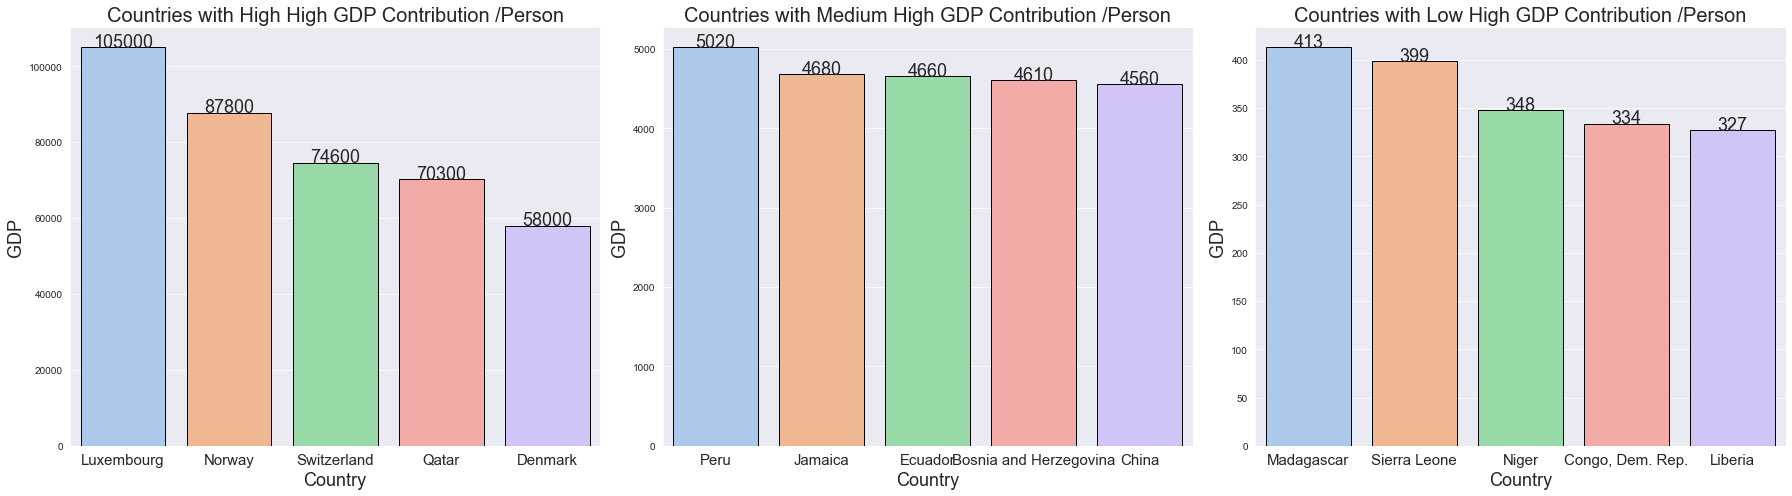

In [984]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = data
colors = sns.color_palette("pastel", 5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Function to add labels on bars with increased font size
def add_bar_labels(ax, data_slice):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                ha='center', fontsize=18)  # Increased label font size

# Plot 1
ax1 = sns.barplot(x='country', y='gdpp', data=data.sort_values(ascending=False, by='gdpp').iloc[:5], palette=colors, edgecolor='black', ax=axs[0])
ax1.set_title('Countries with High High GDP Contribution /Person', fontsize=20)  # Increased title font size
ax1.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax1.set_ylabel('GDP', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax1, data.sort_values(ascending=False, by='gdpp').iloc[:5])
ax1.tick_params(axis='x', labelsize=15)

# Plot 2
ax2 = sns.barplot(x='country', y='gdpp', data=data.sort_values(ascending=False, by='gdpp').iloc[81:86], palette=colors, edgecolor='black', ax=axs[1])
ax2.set_title('Countries with Medium High GDP Contribution /Person', fontsize=20)  # Increased title font size
ax2.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax2.set_ylabel('GDP', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax2, data.sort_values(ascending=False, by='gdpp').iloc[81:86])
ax2.tick_params(axis='x', labelsize=15)

# Plot 3
ax3 = sns.barplot(x='country', y='gdpp', data=data.sort_values(ascending=False, by='gdpp').iloc[161:166], palette=colors, edgecolor='black', ax=axs[2])
ax3.set_title('Countries with Low High GDP Contribution /Person', fontsize=20)  # Increased title font size
ax3.set_xlabel('Country', fontsize=18)  # Increased x-axis label font size
ax3.set_ylabel('GDP', fontsize=18)  # Increased y-axis label font size
add_bar_labels(ax3, data.sort_values(ascending=False, by='gdpp').iloc[161:166])
ax3.tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is China. It has a huge population alongwith huge GDP.
- Luxembourg is again present in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.
- Lower end is again dominated by African nations that labels them as the economically backward.

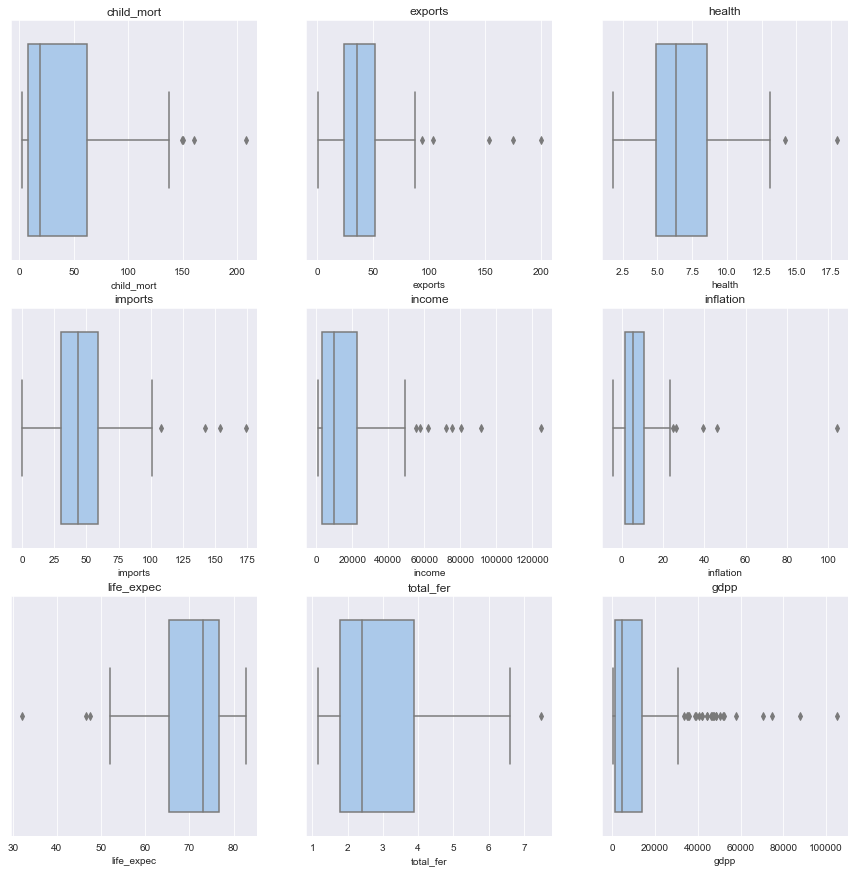

In [985]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

#### Summary of EDA

- From the visualizations and the list of features of an economically backward nations, a host of insights can be gained!
- When it comes to health conditions, African countries hold higher ranks in all the wrong situations. They hold a significant presence in high child_mort, low life_expec and high total_fer.
- All these problems are already pretty serious and hence it is very important to assist them during the periods of unforseen turmoils. Despite such numbers, Haiti grabs the top spot with high values of child_mort. Asian & European countries are present at the other end of it.
- US citizens are the highest spenders on their health however they are not present in the top 5 ranks of life_expec & total_fer. None of the countries with a high life_expec are present in the top 5 of health. Asian countries crowd lower end of health.
- Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. Population size and geographical locations play a pivotal role when it comes to imports and exports.
- Sudan is the only African nation with low imports and Brazil has the lowest imports out of all.
- African countries display very high values of inflation whereas countries from all the continents can be found with low inflation values.
- Citizens of the Qatar are the highest paid with Singapore & Luxembourg again grabbing spots in top 5 of income.
- For gdpp, Luxembourg is in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.
- African nations are present in the lower end of income as well as gdpp. Colonization has had a huge toll on the African nations.

#### Correlation Matrix

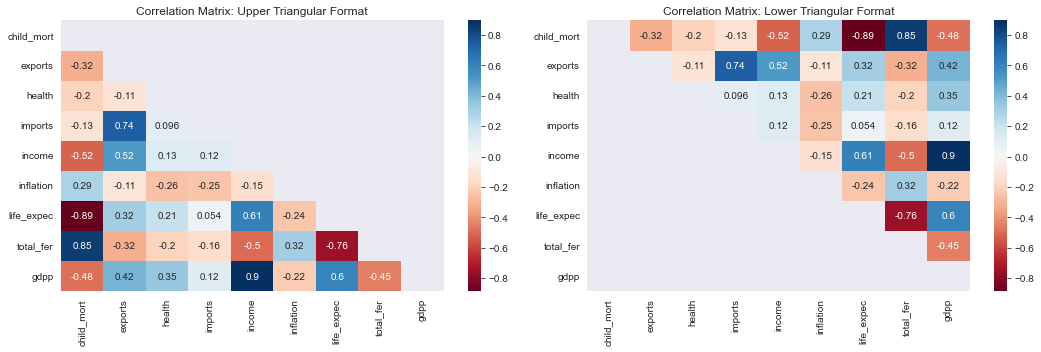

In [986]:
ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data.corr(), cmap='RdBu', annot=True, cbar=True, mask=ut)
plt.title('Correlation Matrix: Upper Triangular Format')

plt.subplot(1, 2, 2)
sns.heatmap(data.corr(), cmap='RdBu', annot=True, cbar=True, mask=lt)
plt.title('Correlation Matrix: Lower Triangular Format')

plt.tight_layout()
plt.show()


- Many features have relationships with each other.
- child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!
- Rise in exports clearly increases gdpp, income & imports.
- Spending on health has a small rise in life_expec and also decreases the child_mort.
- income & gdpp display a very high 0.9 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
- As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.
- According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.

We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.

The 3 categories of the features are :
- health : child_mort, health, life_expec, total_fer
- trade : imports, exports
- finance : income, inflation, gdpp

Hence, we will dissolve these features into these categories and normalize them!


### Feature Scaling :

In [987]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df2 = data.copy(deep = True)

col = list(data.columns)
#col.remove('health')
col.remove('country')

#df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = ss.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68
1,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49
2,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47
3,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52
4,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04


### Pricipal Component Analysis

In [988]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

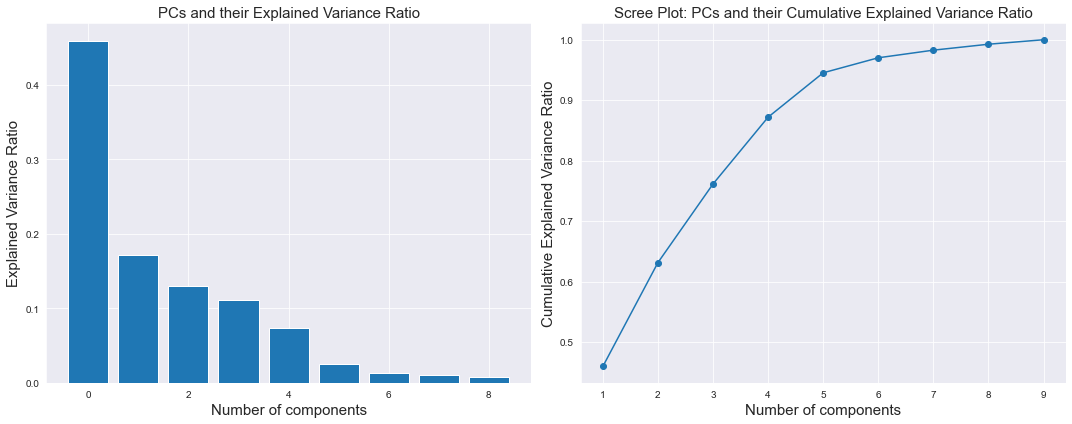

In [989]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'pca' is your PCA model

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Explained Variance Ratio for Each PC
axs[0].bar([i for i, _ in enumerate(var)], var)
axs[0].set_title('PCs and their Explained Variance Ratio', fontsize=15)
axs[0].set_xlabel('Number of components', fontsize=15)
axs[0].set_ylabel('Explained Variance Ratio', fontsize=15)

# Scree Plot: PCs and their Cumulative Explained Variance Ratio
axs[1].plot(range(1,10),cumulative_var, marker='o')
axs[1].set_title('Scree Plot: PCs and their Cumulative Explained Variance Ratio', fontsize=15)
axs[1].set_xlabel('Number of components', fontsize=15)
axs[1].set_ylabel('Cumulative Explained Variance Ratio', fontsize=15)

plt.tight_layout()
plt.show()


The plot indicates the threshold of 90% is getting crossed at PC = 4. Ideally, we can keep 4 (or atmost 5) components here. Before PC = 5, the plot is following an upward trend. After crossing 5, it is almost steady. However, we have retailed all 9 PCs here to get the full data in results. And for visualization purpose in 2-D figure, we have plotted only PC1 vs PC2.

In [920]:
#Principal Component Data Decomposition
colnames = col
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.42,0.19,-0.03,0.37,-0.17,0.20,-0.08,-0.68,0.33
1,exports,0.28,0.61,0.14,0.00,0.06,-0.06,-0.71,-0.01,-0.12
2,health,0.15,-0.24,-0.60,0.46,0.52,0.01,-0.25,0.07,0.11
3,imports,0.16,0.67,-0.30,-0.07,0.26,-0.03,0.59,-0.03,0.10
4,income,0.40,0.02,0.30,0.39,-0.25,0.16,0.10,0.35,0.61
5,inflation,-0.19,-0.01,0.64,0.15,0.71,0.07,0.10,-0.01,-0.03
6,life_expec,0.43,-0.22,0.11,-0.20,0.11,-0.60,0.02,-0.50,0.29
7,total_fer,-0.40,0.16,0.02,0.38,-0.14,-0.75,0.03,0.29,-0.03
8,gdpp,0.39,-0.05,0.12,0.53,-0.18,0.02,0.24,-0.25,-0.63


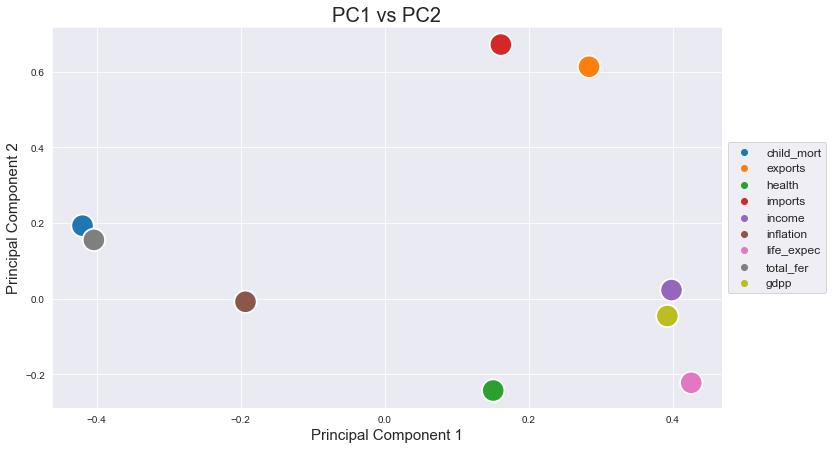

In [921]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_data contains data for PC1, PC2, and Features

fig = plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(pca_data.PC1, pca_data.PC2, hue=pca_data.Features, marker='o', s=500)
plt.title('PC1 vs PC2', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)

# Move legend outside the graph
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize='large')  # Adjust the parameters for placement

plt.show()

We can see that 1st Principal Component (X-axis) is gravitated mainly towards features like: ........

We can see that 2nd Principal Component (X-axis) is gravitated mainly towards features like: ........

In [922]:
new_column_names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
pca_df.columns = new_column_names[:len(pca_df.columns)]  # Ensure to limit to the number of columns in pc_df
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.91,0.10,-0.72,1.01,-0.16,-0.25,0.38,0.42,-0.01
1,0.43,-0.59,-0.33,-1.16,0.17,0.08,0.25,-0.22,0.17
2,-0.29,-0.46,1.22,-0.87,0.16,-0.40,-0.09,-0.18,0.08
3,-2.93,1.70,1.53,0.84,-0.27,-0.55,-0.44,-0.36,-0.09
4,1.03,0.14,-0.23,-0.85,-0.19,-0.21,0.24,-0.02,0.09
...,...,...,...,...,...,...,...,...,...
162,-0.82,0.64,-0.39,-0.71,-0.40,0.01,-0.10,0.52,-0.50
163,-0.55,-1.23,3.10,-0.12,2.08,0.10,0.21,-0.08,-0.28
164,0.50,1.39,-0.24,-1.07,1.18,0.05,-0.14,-0.22,-0.04
165,-1.89,-0.11,1.11,0.06,0.62,-0.54,0.06,0.09,-0.10


#### Biplot

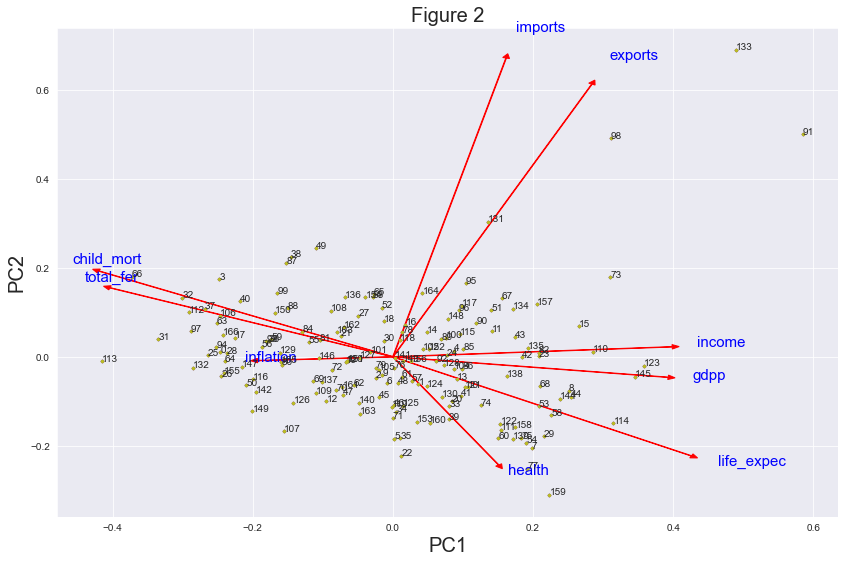

In [923]:
pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df2),
               columns = ['PC 1', 'PC 2'])

PC1 = pca.fit_transform(df2)[:,0]
PC2 = pca.fit_transform(df2)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df2.columns

fig, ax = plt.subplots(figsize=(14, 9))
 
for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], 
             head_width=0.01, 
             head_length=0.01, 
             color="red")
    ax.text(ldngs[0, i] * 1.09, 
            ldngs[1, i] * 1.09, 
            feature,color="blue", fontsize=15)
 
    ax.scatter(PC1 * scalePC1,
                    PC2 * scalePC2, s=5)
 
for i, label in enumerate(PC_scores.index):
    ax.text(PC1[i] * scalePC1, 
            PC2[i] * scalePC2, str(label), 
            fontsize=10)
 
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 2', fontsize=20)
plt.show()

### Factor Analysis

In [924]:
from numpy.linalg import eig

var_cov = pd.DataFrame(np.cov(df2.T))
w,v=eig(var_cov)
w

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.06727787, 0.08884738, 0.1141221 ])

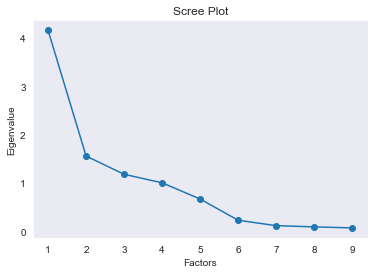

In [925]:
plt.scatter(range(1,df2.shape[1]+1),np.sort(w)[::-1])
plt.plot(range(1,df2.shape[1]+1),np.sort(w)[::-1])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### Proportion of total variance due to factors

In [926]:
prop= np.sort(w)[::-1]/np.trace(var_cov)
cum_prop = np.cumsum(prop)
fa_var = pd.DataFrame(np.sort(w)[::-1], columns=["Eigen_val"])
fa_var["Proportion Var"] = prop
fa_var["Cumulative Var"] = cum_prop
fa_var.index = range(1,10)
fa_var

,Eigen_val,Proportion Var,Cumulative Var
1,4.16,0.46,0.46
2,1.56,0.17,0.63
3,1.18,0.13,0.76
4,1.00,0.11,0.87
5,0.66,0.07,0.95
6,0.22,0.02,0.97
7,0.11,0.01,0.98
8,0.09,0.01,0.99
9,0.07,0.01,1.00


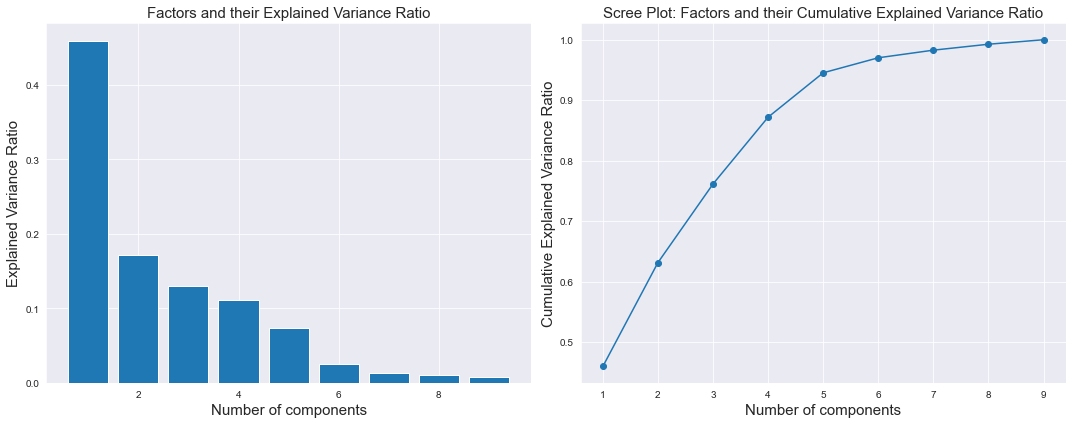

In [927]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'pca' is your PCA model

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Explained Variance Ratio for Each PC
axs[0].bar(range(1,10), prop)
axs[0].set_title('Factors and their Explained Variance Ratio', fontsize=15)
axs[0].set_xlabel('Number of components', fontsize=15)
axs[0].set_ylabel('Explained Variance Ratio', fontsize=15)

# Scree Plot: PCs and their Cumulative Explained Variance Ratio
axs[1].plot(range(1,df2.shape[1]+1),cum_prop, marker='o')
axs[1].set_title('Scree Plot: Factors and their Cumulative Explained Variance Ratio', fontsize=15)
axs[1].set_xlabel('Number of components', fontsize=15)
axs[1].set_ylabel('Cumulative Explained Variance Ratio', fontsize=15)

plt.tight_layout()
plt.show()

#### Factor loadings

In [928]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,n_factors=5)
fa.fit(df2)
loadings = pd.DataFrame(fa.loadings_,index=df2.columns)
loadings.columns= range(1,6)

In [929]:
communalities = fa.get_communalities()
specific_var = np.diag(var_cov) - communalities
loadings['Communalities']= communalities
loadings['Specific Variance'] = specific_var

def color_red(val):
    color = 'red' if abs(val) > 0.5 else 'black'
    return f'color: {color}'

loadings = loadings.style.applymap(color_red)
loadings

,1,2,3,4,5,Communalities,Specific Variance
child_mort,-0.861817,0.256833,0.115015,0.409425,-0.076482,0.995397,0.010627
exports,0.568741,0.683238,0.227697,-0.095659,-0.091966,0.859735,0.146289
health,0.279642,-0.172964,-0.318951,0.384753,0.498945,0.606827,0.399197
imports,0.335173,0.887453,-0.193368,-0.058923,0.233680,0.995384,0.010640
income,0.800834,-0.019713,0.378113,0.274732,-0.165687,0.887624,0.118400
inflation,-0.399224,-0.071246,0.791957,-0.242559,0.380153,0.995003,0.011021
life_expec,0.840554,-0.273433,0.013631,-0.218926,0.033578,0.830538,0.175486
total_fer,-0.777274,0.170440,0.127801,0.287318,-0.033744,0.733228,0.272796
gdpp,0.809975,-0.082308,0.277621,0.506070,-0.001798,0.996018,0.010007


#### Factor loadings with Varimax

In [930]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(rotation = "varimax",n_factors=5)
fa2.fit(df2)
loadings2 = pd.DataFrame(fa2.loadings_,index=df2.columns)
loadings2.columns= range(1,6)

In [931]:
communalities2 = fa2.get_communalities()
specific_var2 = np.diag(var_cov) - communalities2
loadings2['Communalities']= communalities2
loadings2['Specific Variance'] = specific_var2

def color_red(val):
    color = 'red' if abs(val) > 0.5 else 'black'
    return f'color: {color}'

loadings2 = loadings2.style.applymap(color_red)
loadings2

,1,2,3,4,5,Communalities,Specific Variance
child_mort,0.969352,-0.183766,-0.087113,0.090161,-0.079162,0.995397,0.010627
exports,-0.206445,0.379718,0.788353,0.000063,-0.226780,0.859735,0.146289
health,-0.115885,0.115793,-0.015044,-0.121243,0.751707,0.606827,0.399197
imports,-0.024956,-0.031958,0.980653,-0.125212,0.127987,0.995384,0.010640
income,-0.367372,0.855194,0.142919,-0.024433,-0.016787,0.887624,0.118400
inflation,0.175518,-0.055869,-0.106624,0.962733,-0.151167,0.995003,0.011021
life_expec,-0.829378,0.361349,0.029963,-0.059453,0.087547,0.830538,0.175486
total_fer,0.805192,-0.208096,-0.119232,0.144349,-0.080852,0.733228,0.272796
gdpp,-0.285421,0.910695,0.095198,-0.072393,0.266239,0.996018,0.010007


### Hierarchical clustering

#### Single Linkage

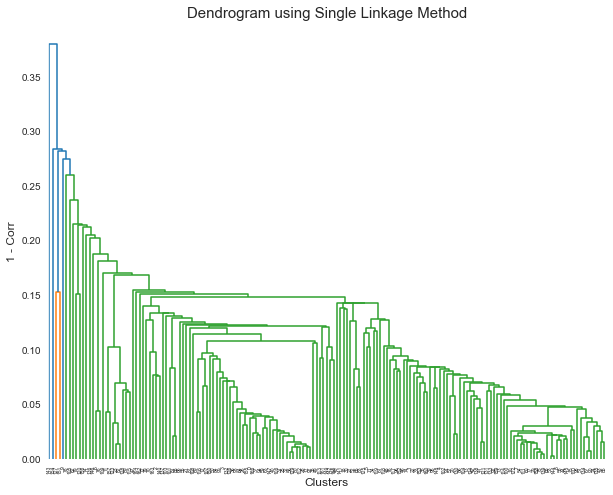

In [932]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Assuming 'df2' is your data for clustering

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False

# Set the figure size before generating the dendrogram
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

dendrogram = sch.dendrogram(sch.linkage(df2, method='single', metric = 'correlation'))
plt.title("Dendrogram using Single Linkage Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('1 - Corr', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

#### Average Linkage

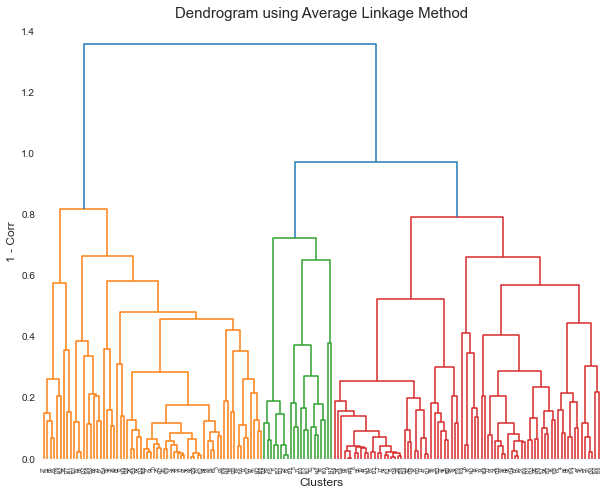

In [933]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Assuming 'df2' is your data for clustering

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False

# Set the figure size before generating the dendrogram
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

dendrogram = sch.dendrogram(sch.linkage(df2, method='average', metric = 'correlation'))
plt.title("Dendrogram using Average Linkage Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('1 - Corr', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

In [934]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=3, affinity='correlation', linkage='average')  
clusters1 = cluster.fit_predict(df2)
clusters1

array([0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0])

In [935]:
from collections import defaultdict

# Create a dictionary to store countries for each cluster
grouped_countries = defaultdict(list)
for label, country in zip(clusters, data['country']):
    grouped_countries[label].append(country)

# Find the maximum length among all clusters
max_length = max(len(countries) for countries in grouped_countries.values())

# Extend lists with blank values to make all arrays of the same length
for label, countries in grouped_countries.items():
    diff = max_length - len(countries)
    if diff > 0:
        grouped_countries[label].extend([''] * diff)

# Create a DataFrame with clusters as columns containing corresponding country names
df_clusters1 = pd.DataFrame(grouped_countries)
df_clusters1

,0,1,2
0,Afghanistan,Albania,Algeria
1,Angola,Antigua and Barbuda,Argentina
2,Bangladesh,Armenia,Azerbaijan
3,Benin,Australia,Bahrain
4,Bolivia,Austria,Brunei
...,...,...,...
75,,Ukraine,
76,,United Kingdom,
77,,United States,
78,,Uruguay,


In [936]:
grouped_countries = {label: [] for label in set(clusters1)}  # Initialize empty lists for each label
for label, country in zip(clusters1, data['country']):
    grouped_countries[label].append(country)

# Display clusters
for label, countries in grouped_countries.items():
    print(f"Cluster {label}: {', '.join(countries)}", end="\n\n")

Cluster 0: Afghanistan, Angola, Bangladesh, Benin, Bolivia, Botswana, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Egypt, Equatorial Guinea, Eritrea, Fiji, Gabon, Gambia, Ghana, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Iraq, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Mozambique, Myanmar, Namibia, Nepal, Niger, Pakistan, Philippines, Rwanda, Samoa, Senegal, Sierra Leone, Solomon Islands, South Africa, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Tonga, Turkmenistan, Uganda, Vanuatu, Yemen, Zambia

Cluster 1: Albania, Antigua and Barbuda, Armenia, Australia, Austria, Bahamas, Barbados, Belarus, Belgium, Belize, Bhutan, Bosnia and Herzegovina, Brazil, Bulgaria, Canada, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, El Salvador, Estonia

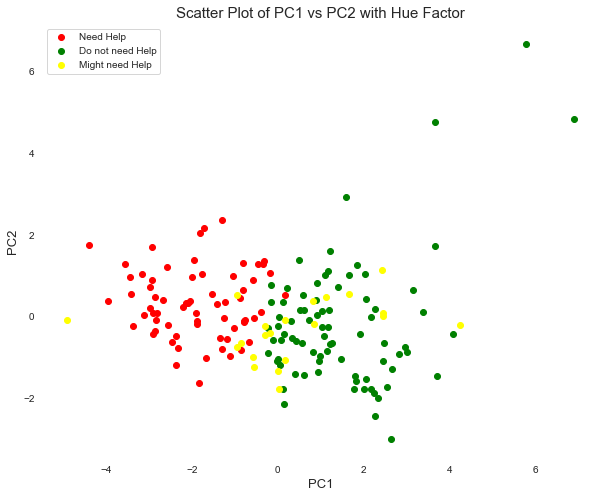

In [937]:
pca_df['cluster_avg']= clusters1
hue_colors = {0: 'red', 1: 'green', 2: 'yellow'}
hue_labels = {0: 'Need Help', 1: 'Do not need Help', 2: 'Might need Help'}

plt.figure(figsize=(10, 8))

# Scatter plot with custom colors based on the 'HueFactor'
for val, color in hue_colors.items():
    data_subset = pca_df[pca_df['cluster_avg'] == val]
    plt.scatter(data_subset['PC1'], data_subset['PC2'], label=hue_labels[val], color=color)

plt.title('Scatter Plot of PC1 vs PC2 with Hue Factor', fontsize=15)
plt.xlabel('PC1', fontsize=13)
plt.ylabel('PC2', fontsize=13)
plt.legend()
plt.show()

In [938]:
y_mean = cl.fit_predict(df2)
print(f'Silhouette Score(n=3): {silhouette_score(df2, y_mean, metric="correlation")}')

Silhouette Score(n=3): 0.4131345773650231


#### Complete Linkage

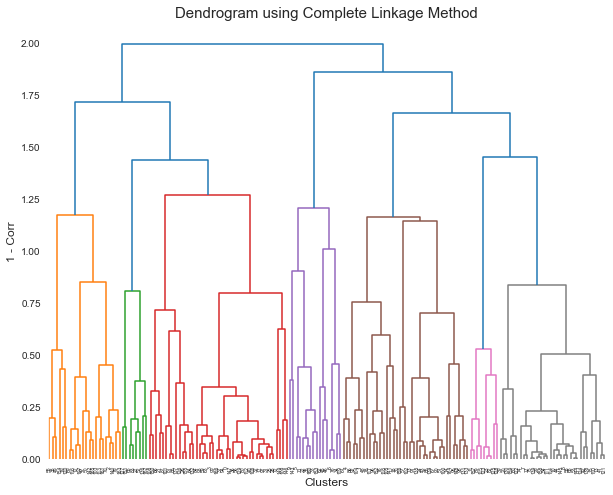

In [939]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Assuming 'df2' is your data for clustering

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False

# Set the figure size before generating the dendrogram
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

dendrogram = sch.dendrogram(sch.linkage(df2, method='complete', metric = 'correlation'))
plt.title("Dendrogram using Complete Linkage Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('1 - Corr', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

In [940]:
from sklearn.cluster import AgglomerativeClustering
cl2 = AgglomerativeClustering(n_clusters=3, affinity='correlation', linkage='complete')  
clusters2 = cl2.fit_predict(df2)
clusters2

array([0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0])

In [941]:
from collections import defaultdict

# Create a dictionary to store countries for each cluster
grouped_countries = defaultdict(list)
for label, country in zip(clusters2, data['country']):
    grouped_countries[label].append(country)

# Find the maximum length among all clusters
max_length = max(len(countries) for countries in grouped_countries.values())

# Extend lists with blank values to make all arrays of the same length
for label, countries in grouped_countries.items():
    diff = max_length - len(countries)
    if diff > 0:
        grouped_countries[label].extend([''] * diff)

# Create a DataFrame with clusters as columns containing corresponding country names
df_clusters2 = pd.DataFrame(grouped_countries)
df_clusters2

,0,1,2
0,Afghanistan,Albania,Argentina
1,Algeria,Antigua and Barbuda,Armenia
2,Angola,Australia,Azerbaijan
3,Bangladesh,Austria,Brazil
4,Benin,Bahamas,Chile
...,...,...,...
74,,Ukraine,
75,,United Arab Emirates,
76,,United Kingdom,
77,,United States,


In [942]:
grouped_countries = {label: [] for label in set(clusters2)}  # Initialize empty lists for each label
for label, country in zip(clusters2, data['country']):
    grouped_countries[label].append(country)

# Display clusters
for label, countries in grouped_countries.items():
    print(f"Cluster {label}: {', '.join(countries)}", end="\n\n")

Cluster 0: Afghanistan, Algeria, Angola, Bangladesh, Benin, Bolivia, Botswana, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Egypt, Equatorial Guinea, Eritrea, Fiji, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Iraq, Kazakhstan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Mongolia, Mozambique, Myanmar, Namibia, Nepal, Niger, Nigeria, Pakistan, Philippines, Rwanda, Samoa, Senegal, Sierra Leone, Solomon Islands, South Africa, Sri Lanka, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Tonga, Turkmenistan, Uganda, Uzbekistan, Vanuatu, Venezuela, Yemen, Zambia

Cluster 1: Albania, Antigua and Barbuda, Australia, Austria, Bahamas, Bahrain, Barbados, Belarus, Belgium, Belize, Bhutan, Bosnia and Herzegovina, Brunei, Bulgaria, Canada, Cape Verde, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, El Salv

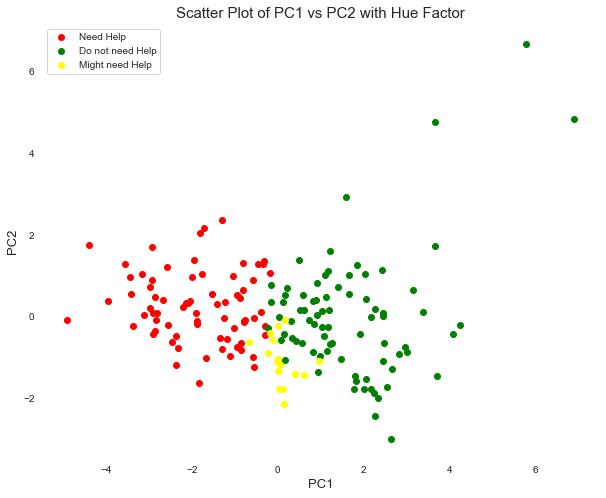

In [943]:
pca_df['cluster_complete']= clusters2
hue_colors = {0: 'red', 1: 'green', 2: 'yellow'}
hue_labels = {0: 'Need Help', 1: 'Do not need Help', 2: 'Might need Help'}

plt.figure(figsize=(10, 8))

# Scatter plot with custom colors based on the 'HueFactor'
for val, color in hue_colors.items():
    data_subset = pca_df[pca_df['cluster_complete'] == val]
    plt.scatter(data_subset['PC1'], data_subset['PC2'], label=hue_labels[val], color=color)

plt.title('Scatter Plot of PC1 vs PC2 with Hue Factor', fontsize=15)
plt.xlabel('PC1', fontsize=13)
plt.ylabel('PC2', fontsize=13)
plt.legend()
plt.show()

In [944]:
y_mean2 = cl2.fit_predict(df2)
print(f'Silhouette Score(n=3): {silhouette_score(df2, y_mean2, metric="correlation")}')

Silhouette Score(n=3): 0.34090210212479644


# Non Heirarchiral Clustering

### K-Means clustering

In [945]:
import numpy as np

class KMeansCustom:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, X):
        np.random.seed(self.random_state)
        # Randomly initialize centroids
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iter):
            # Assign labels based on closest centroid
            self.labels = self._assign_labels(X)

            # Update centroids based on mean of points in each cluster
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)


In [946]:
d = df2.values

# Initialize and fit KMeansCustom
kmeans_custom = KMeansCustom(n_clusters=3, random_state=69, max_iter=1000)
kmeans_custom.fit(d)

# Retrieve cluster labels
labels_custom = kmeans_custom.labels


In [947]:
labels_custom

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [948]:
from collections import defaultdict

# Create a dictionary to store countries for each cluster
grouped_countries = defaultdict(list)
for label, country in zip(labels_custom, data['country']):
    grouped_countries[label].append(country)

# Find the maximum length among all clusters
max_length = max(len(countries) for countries in grouped_countries.values())

# Extend lists with blank values to make all arrays of the same length
for label, countries in grouped_countries.items():
    diff = max_length - len(countries)
    if diff > 0:
        grouped_countries[label].extend([''] * diff)

# Create a DataFrame with clusters as columns containing corresponding country names
df_clusters3 = pd.DataFrame(grouped_countries)
df_clusters3

,1,0,2
0,Afghanistan,Albania,Australia
1,Angola,Algeria,Austria
2,Benin,Antigua and Barbuda,Bahrain
3,Burkina Faso,Argentina,Belgium
4,Burundi,Armenia,Brunei
...,...,...,...
81,,Uruguay,
82,,Uzbekistan,
83,,Vanuatu,
84,,Venezuela,


In [949]:
grouped_countries = {label: [] for label in set(labels_custom)}  # Initialize empty lists for each label
for label, country in zip(labels_custom, data['country']):
    grouped_countries[label].append(country)

# Display clusters
for label, countries in grouped_countries.items():
    print(f"Cluster {label}: {', '.join(countries)}", end="\n\n")

Cluster 0: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam

Cluster 1: Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African R

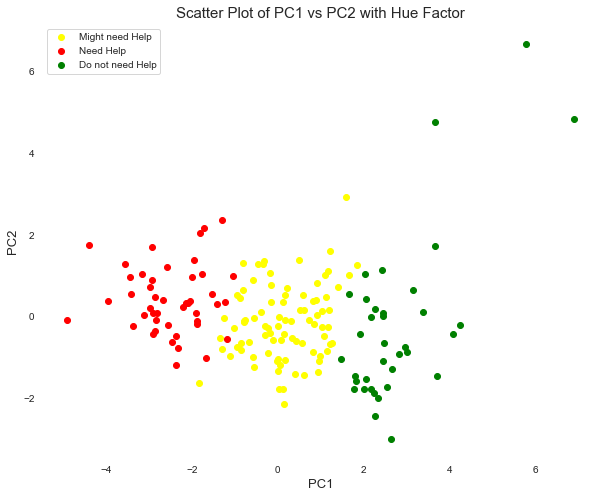

In [950]:
pca_df['cluster_kmeans']= labels_custom
hue_colors = {0: 'yellow', 1: 'red', 2: 'green'}
hue_labels = {0: 'Might need Help', 1: 'Need Help', 2: 'Do not need Help'}

plt.figure(figsize=(10, 8))

# Scatter plot with custom colors based on the 'HueFactor'
for val, color in hue_colors.items():
    data_subset = pca_df[pca_df['cluster_kmeans'] == val]
    plt.scatter(data_subset['PC1'], data_subset['PC2'], label=hue_labels[val], color=color)

plt.title('Scatter Plot of PC1 vs PC2 with Hue Factor', fontsize=15)
plt.xlabel('PC1', fontsize=13)
plt.ylabel('PC2', fontsize=13)
plt.legend()
plt.show()

In [780]:
y_mean3 = kmeans_custom.predict(d)
print(f'Silhouette Score(n=3): {silhouette_score(df2, y_mean3)}')

Silhouette Score(n=3): 0.285600988953231


### World Map (Hierarchical Clustering with Average Linkage)

In [951]:
pca_df.insert(0,column = 'Country', value = data['country'])

In [965]:
colorscale = [ "red", "green", "yellow"]

fig = px.choropleth(
    pca_df,
    locations="Country",  # Column containing country names
    locationmode="country names",
    color="cluster_avg",  # Column with the cluster values
    color_continuous_scale=colorscale,
    range_color=[0, 2],  # Range of your cluster values
    labels={'cluster_avg': 'Cluster'},  # Label for the legend
    title="Cluster Average across Countries"
)

fig.update_layout(coloraxis_colorbar=dict(
    title="Cluster",  # Label for the legend colorbar
    tickvals=[0, 1, 2],  # Define tick values corresponding to clusters
    ticktext=["Need Help", "Do not need Help", "Might Need Help"],  # Text for legend ticks
))

fig.show()

In [991]:
def workingweeks(projC):
    num_projects = len(projC)
    max_weeks = 0
    
    # Sort the projects in descending order of modules
    projC.sort(reverse=True)
    
    # Consider the most modules project first
    while projC[0] > 0:
        # Work on the project with the most modules
        for i in range(num_projects):
            if projC[i] > 0:
                projC[i] -= 1
                max_weeks += 1
            
            # Ensure modules are chosen from different projects in successive weeks
            if i == 0:
                break
        
        # Sort again to consider the project with the most remaining modules
        projC.sort(reverse=True)
    
    return max_weeks

# Example usage:
projects = [7, 2, 3]
print(workingweeks(projects))  # Output: 11

12


In [992]:
def workingweeks(projects):
    max_modules = 0
    total_sum = 0
    for modules in projects:
        total_sum += modules
        if modules > max_modules:
            max_modules = modules
    rest_sum = total_sum - max_modules
    return rest_sum + min(max_modules, rest_sum + 1)

In [993]:
projects = [7, 2, 3]
print(workingweeks(projects)) 

11


In [994]:
def minLength(systemState, dist):
    total_length = 0
    current_length = 0
    
    for i in range(len(systemState)):
        if systemState[i] == 0:  # If the system is OFF
            current_length += dist[i]  # Add the distance to the current length
        else:
            total_length += current_length  # Add the current length to the total
            current_length = 0  # Reset the current length
    
    return total_length

In [1042]:
s = [0,0,0,1]
d = [1,5,6]

In [1039]:
def nearest_one(system_state, i):
    nearest_left = None
    nearest_right = None

    # Find the nearest '1' to the left of index i
    for left in range(i - 1, -1, -1):
        if system_state[left] == 1:
            nearest_left = left
            break

    # Find the nearest '1' to the right of index i
    for right in range(i + 1, len(system_state)):
        if system_state[right] == 1:
            nearest_right = right
            break

    return nearest_left, nearest_right



In [1043]:
nearest_one(s,0)

(None, 3)

In [1030]:


def minLength(systemState, dist):
    off_systems = [i for i, val in enumerate(systemState) if val == 0]  # Find the indices of OFF system

    total_cable_length = 0
    for i in off_systems:
        if i == 0:
            min_length = d[1] - d[0]
        elif i == len(systemState)-1:
            min_length = d[i] - d[i-1]
        else:
            min_length = min(d[i+1]-d[i], d[i]-d[i-1])
        total_cable_length += min_length # Calculate the cable length needed
    return total_cable_length


In [1031]:
minLength(s,d)

2

In [1033]:
off_systems = [i for i, val in enumerate(s) if val == 0]
off_systems

[1, 2]

In [1004]:
def minLength(systemState, dist):
    min_cable_length = float('inf')

    last_on_index = None

    for i in range(len(systemState)):

        if systemState[i] == 1:

            last_on_index = i

    for i in range(1, last_on_index + 1):

        if systemState[i] == 0:

            cable_length = dist[i] - dist[last_on_index]

        min_cable_length = min(min_cable_length, cable_length)

    return min_cable_length

In [1023]:
minLength(s,d)

2

In [1006]:
def min_cable_length(systemState_size, systemState, dist_size, dist):
    # Find the indices of ON systems
    on_indices = [i for i in range(systemState_size) if systemState[i] == 1]

    # Initialize minimum cable length
    min_length = 0

    # Calculate the length of cables needed
    for i in range(1, len(on_indices)):
        distance = dist[on_indices[i]] - dist[on_indices[i - 1]]
        min_length += distance

    return min_length

# Reading input
systemState_size = int(input())
systemState = list(map(int, input().split()))
dist_size = int(input())
dist = list(map(int, input().split()))

# Calculate and print the minimum length of cable
result = min_cable_length(systemState_size, systemState, dist_size, dist)
print(result)


3
1 0 0
3
1 5 6
0


In [1008]:
n = int(input())
states = list(map(int, input().split()))
distances = list(map(int, input().split()))
distance = 0
for i in range(len(distances)-1):
    distance = distance + distances[i+1] - distances[i]
print (distance)

7
1 0 1 1 0 1 1
1 5 6 7 8 9 17
16


In [1048]:
def process_file(filename):
    try:
        with open(filename, "wt") as f:
            f.write("Python is efficient\n")
        f=open (filename, "at")
        f.write("Django is based on Python\n")
        f.close()
        with open(filename, "rt") as f:
            for i in f.readlines():
                ans=i
        print(ans.split()[2])
    except I0Error:
        print("Error processing file")
                  

process_file("myfile.txt")

based


In [1051]:
a= [3121.14,23243.23,242.32,234234.33]
b= [3121.15,23243.23,245.34,236234.31]

print(list (map(lambda x:"-" if x == 0 else x,list(map(lambda x:"%.2f"%(x[1]-x[0]),zip(a,b))))))

['0.01', '0.00', '3.02', '1999.98']


In [1071]:
from collections import Counter
my_string = "Python is a Programming Language"
counts=Counter(my_string)
try:
    for key, val in counts.items() :
        if val>3:
            print("{key} occured {val} times".format(key=key, val=str (val)))
except ValueError:
    print("Not enough values to unpack")

  occured 4 times
a occured 4 times
g occured 4 times


In [1067]:
import re
class Team_A_json_decorator:
    def __init__(self, func):
        self. func=func 
        self.name_pat=r'\AName:.+.log' 
        self.src_pat=r's[a-z]{5):.*' 
        self.info_pat=r'I[a-z]{3}:\s.*' 
        self.csrf=r'csrf:\s.*'
    
    def call(self, *args,**kwargs):
        self.son=self.func(*args, **kwargs) 
        changed_json=self.alter_data(self.name_pat, "Name: ", self.json) 
        changed_json=self.alter_data(self.src_pat, "Source: ", changed_json)
        changed_json=self.alter_data(self.info_pat, "Info: ", changed_json)
        csrf="".join(re.findall(self.csrf,self.json))
        A_csrf="*****"
        changed_json=re.sub(self.csrf, 'csrf: '+A_csrf, changed_json) 
        return changed_json + "A Data: Process 2578 completed"
    
@Team_A_json_decorator
def fetch_json_data() :
    json_data="""Name: AR_B_08317.log
    Source: EOD B Outp
    Info: AR_B job log for process 08317
    csrf: abcde
    """
    return json_data 

data_to_send=fetch_json_data() 
print(data_to_send)

TypeError: 'Team_A_json_decorator' object is not callable

In [1066]:
@Team_A_json_decorator
def fetch_json_data() :
    json_data="""Name: AR_B_08317.log
    Source: EOD B Outp
    Info: AR_B job log for process 08317
    csrf: abcde
    """
    return json_data 

data_to_send=fetch_json_data() 
print(data_to_send)

TypeError: 'Team_A_json_decorator' object is not callable

In [1068]:
try:
    fi = open ("test1", "w")
    fi.write("This is a test for exception handling!!")
except IOError:
    print("Error: cannot find the file")
else:
    print ("Writting into file successful")
    fi.close ()

Writting into file successful


In [1073]:
#1/usr/bin/python3
import re
p = re.search( 'python|an', 'This is an example of python3 regular expressions')
print(p.group())

an


In [1074]:
import numpy as np 
print(np.ones((2,1)))

[[1.]
 [1.]]


In [1106]:
def func (p, q): 
    for i in res:
        if (i=="A" and g[p][q+1]!="*"): q+=1 
        if (i=="B" and g[p][q-1]!="*"): q-=1
        if (i=="q" and g[p-1][q]!="*"):p-=1
        if (i=="D" and g[p+1][q]!="*"): p+=1
    return p,q

def fun(p, q, d):
    vis[p][q]=1 
    pth[p][q]=d
    if(vis[p+1][g]!=1 and g[p+1][q]!='*'):fun (p+1,q, "E"+d)
    if(vis[p-1][g]!=1 and g[p-1][q]!='*'):fun(p-1,q,"F"+d)
    if (vis[p][q+1]!=1 and g[p][q+1]!='*'):fun(p, q+1, "G"+d)
    if(vis[p][g-1]!=1 and g[p][q-1]!='*'):fun(P, q-1, "H"+d)
    
n, m=map (int, input().split()) 
g= [ ]
for i in range(n):
    g.append(input())
vis=[[0 for i in range(m)]for i in range(n)] 
pth=[['' for i in range(m) ]for i in range(n)]

begin_p=0
begin_q=0 
res=""
for k in range(n): 
    for j in range(m): 
        if(g[k][j]=='C'):
            begin_q=j 
            begin_p=k
            
fun(begin_p,begin_q,"")
vis=[[O for i in range (m)]for i in range(n)]
for k in range(n): 
    for j in range(m): 
        if(g[k][i]=="."):
            begin_q =j
            begin_p = k
fun(begin_p,begin_q,"")

fun (begin_p,begin_q,"")
vis=[[O for i in range(m)]for i in range(n)]

for k in range(n): 
    for j in range(m): 
        if(g[k][j]=="."): 
            fk, fj=func(k,j) 
            rest+=pth[fk][fj]
print(res)

4 4
****
*.C*
*..*
****


TypeError: list indices must be integers or slices, not list

In [1082]:
from functools import reduce
nums = [7,5,1,8]
summ = reduce(lambda x,y:x+y,nums)

In [1083]:
print(summ)

21


In [1084]:
import pandas as pd
fruit = pd.Series(['Mango', 'Apple'])
color = ['Yellow', 'Red']
df=pd.DataFrame(color, index=fruit, columns = ['color'])
print(df)

        color
Mango  Yellow
Apple     Red


In [1091]:
n, s=map(int,input().split()) 
a,b = 1,n+1 


10 9


In [1092]:
a

1

In [1093]:
b

11

In [1096]:
while a<b:
    c= (a+b)/2
    if c - sum(map(int, str(int(c)))) < s:
        a=c+1 
    else:
        b=c 

In [1097]:
print(n-a+1)

1.0


In [1098]:
def patern():
    for i in range (5):
        for j in range (i+1): 
            print (end="* ")
        print ()
    for i in range (5):
        for j in range(i, 5):
            print (end="* ")
        print ()
patern()

* 
* * 
* * * 
* * * * 
* * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [1102]:
n = int(input( ))
l1=[]
l2=[]
def fn(n):
    for i in range (0, n):
        ele = int(input( ))
        
    l1.append(ele)
    
    for i in range(0, n):
        ele = int(input())
        
    l2.append(ele)
    
init=0
fn(n)
def clue(n, l1, l2, sum):
    l=l1+l2
    l.sort()
    summ=init
    pos=0
    for i in l:
        if(pos<n):
            sum+=i
        else:
            sum+=2*i 
            pos+=1 
    return(summ)
        

2
1 -1


ValueError: invalid literal for int() with base 10: '1 -1'

In [1107]:
pd.Series(5,index=['g','h', 'i', 'j', 'k'])

g    5
h    5
i    5
j    5
k    5
dtype: int64

In [1111]:
def Function1(n):
    if n < 0:
        print("Incorrect input")
    elif n == 0:
        return 0 
    elif n == 1:
        return 1 
    else:
        return Function1(n - 1) + Function1(n - 2)

def Function2(n, i):
    if n <= 1:
        return False
    if n <= 3:
        return True 
    if i >= n:
        return True 
    if n % i == 0:
        return False 
    else:
        return Function2(n, i + 1)

# Driver Program
if Function2(Function1(10), 2):
    print(Function1(11))
else:
    print(Function1(12))


144


In [1116]:
r = [11, 12, 13, 14]
A = [[0, 10, 20],
[30, 40, 50],
[60, 70, 80]] 
for row in A: 
    for col in row:
        r.append(col+ 10)
for i in range(5):
    del r[2]
for i in range(10):
    r.append(i)
r.sort() 
r.reverse()
for i in range(len(r) // 2):
    temp = r[i]
    r[i] = r[len(r) - i - 1]
    r[len(r) - i - 1] = temp

print(r)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 40, 50, 60, 70, 80, 90]


In [1119]:
5&4^5

1

In [1120]:
import nltk

In [1121]:
from nltk.tokenize import sent_tokenize

text = "I love natural language toolkit. It's fascinating!"
sentences = sent_tokenize(text.lower ( ))
print(sentences)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/vanshitgosain/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/share/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [1122]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

In [1123]:
pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1124]:
import nltk
from nltk.tokenize import sent_tokenize

text = "I love natural language toolkit. It's fascinating!"
sentences = sent_tokenize(text.lower())
print(sentences)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/vanshitgosain/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/share/nltk_data'
    - '/Users/vanshitgosain/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
import nltk
from nitk.tokenize import word_tokenize from nitk.corpus import wordnet
word = "playing"
lemmas = [1
for syn in wordnet. synsets (word):
for lemma in syn. lemmas():
lemmas. append (lemma. name ())
lemmas = list (set (lemmas))
tokens = word_tokenize(*
* join (lemmas))
print (tokens)